In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# Loading data

In [2]:
df = pd.read_csv('sdn_ml.csv')

In [3]:
df.index = df['timestamp']
df.drop('timestamp', axis=1, inplace=True)

In [4]:
df

,hour,minut,second,day,month,delay,sensor_id,temperature,label
timestamp,,,,,,,,,
2004-03-31 02:58:45,2,58,45,31,3,26.0,3,122.153,1
2004-02-28 00:58:46,0,58,46,28,2,26.0,3,20.204,1
2004-03-30 16:04:46,16,4,46,30,3,26.0,3,122.153,1
2004-03-30 14:43:05,14,43,5,30,3,26.0,3,122.153,1
2004-03-30 16:06:06,16,6,6,30,3,26.0,3,122.153,1
...,...,...,...,...,...,...,...,...,...
2004-03-21 19:02:56,19,2,56,21,3,26.0,3,212.134,1
2004-03-21 19:03:27,19,3,27,21,3,26.0,3,211.938,1
2004-03-21 19:04:05,19,4,5,21,3,26.0,3,21.184,1


# general graphic


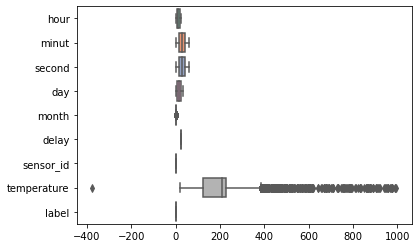

In [5]:
 ax = sns.boxplot(data=df, orient="h", palette="Set2")

# Normalized Graphic 

In [6]:
from sklearn.preprocessing import StandardScaler

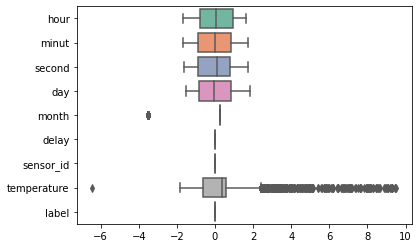

In [7]:
scaler = StandardScaler().fit(df)
norm_subset = pd.DataFrame(scaler.transform(df), columns = df.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

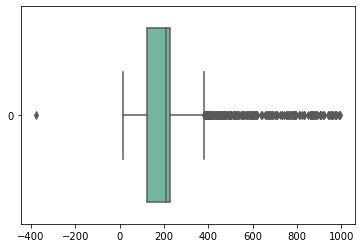

In [8]:
ax = sns.boxplot(data=df['temperature'], orient="h", palette="Set2")

Text(0.5, 1.0, 'Attribute: temperature')

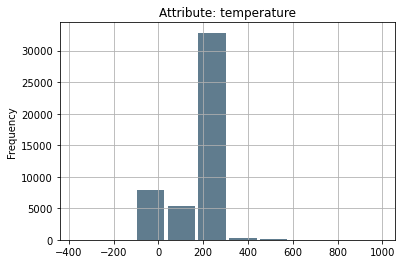

In [9]:
df["temperature"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: temperature")

Text(0.5, 1.0, 'Attribute: temperature')

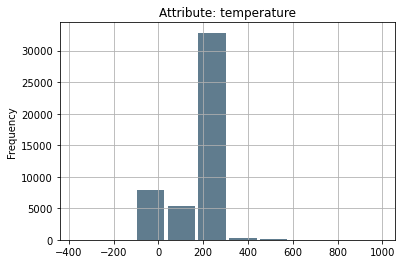

In [10]:
df["temperature"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: temperature")

In [11]:
df.corr()

,hour,minut,second,day,month,delay,sensor_id,temperature,label
hour,1.000000,0.002958,0.005998,0.000096,-0.021388,NaN,NaN,0.077288,NaN
minut,0.002958,1.000000,0.001207,-0.001123,-0.001491,NaN,NaN,-0.005957,NaN
second,0.005998,0.001207,1.000000,0.095754,-0.105342,NaN,NaN,-0.032262,NaN
day,0.000096,-0.001123,0.095754,1.000000,-0.442541,NaN,NaN,-0.124726,NaN
month,-0.021388,-0.001491,-0.105342,-0.442541,1.000000,NaN,NaN,0.044466,NaN
delay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,0.077288,-0.005957,-0.032262,-0.124726,0.044466,NaN,NaN,1.000000,NaN
label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


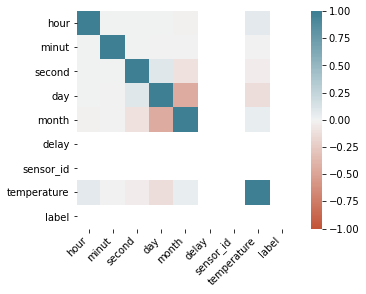

In [12]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

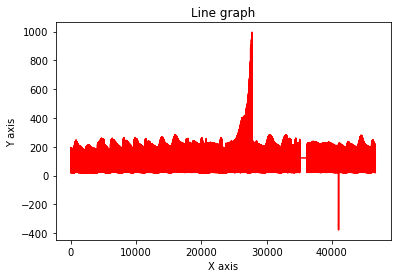

In [13]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(df.temperature)), df.temperature, color ="red")  
plt.show()

In [19]:
def plot_psd(sig, fs=1.0, sig_plot_title=None, psd_plot_title=None, save_path=None, show_plt=True):
    '''
    '''
    f, psd = welch(sig, fs=fs)
    psd = np.abs(np.real(psd))
    fig, axes = plt.subplots(2,1, figsize=(12,8))
    
    sig_x = np.arange(len(sig)) / fs

    axes[0].plot(sig_x, sig, color = "#1371B4")
    plot_title = sig_plot_title if sig_plot_title is not None else "Signal"
    axes[0].set_title(plot_title)
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel("Amplitube (mV)")
    
    axes[1].plot(f,psd, color="#1371B4")
    
    verts = [(f[0], 0), *zip(f, psd), (f[-1], 0)]
    poly = Polygon(verts, color="darkblue", alpha=0.2)
#     poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    axes[1].add_patch(poly)
    
    plot_title = psd_plot_title if psd_plot_title is not None else "PSD"
    axes[1].set_title(plot_title)
    axes[1].set_xlabel("Frequency (Hz)")
    axes[1].set_ylabel("Power (V²/Hz)")
    
    plt.subplots_adjust(hspace=0.3)
    if save_path is not None:
        plt.savefig(save_path)
    if show_plt:
        plt.show()
    
    return axes

In [20]:
data_1 = df[1:2000]-np.min(df[1:2000])/(np.max(df[1:2000]) - np.min(df[1:2000]))

with plt.style.context("ggplot"):
    plot_psd(data_1.flatten(), fs=1000)

AttributeError: 'DataFrame' object has no attribute 'flatten'